# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

# Loading the dataset

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [3]:
df.shape

(545, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


# Handling Missing values

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [6]:
# We don't have any missing values

# Visualizations



> Univariate Analysis



C:\Users\prash\AppData\Local\Temp\ipykernel_17432\719166114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Text(0.5, 1.0, 'Price Distribution plot')

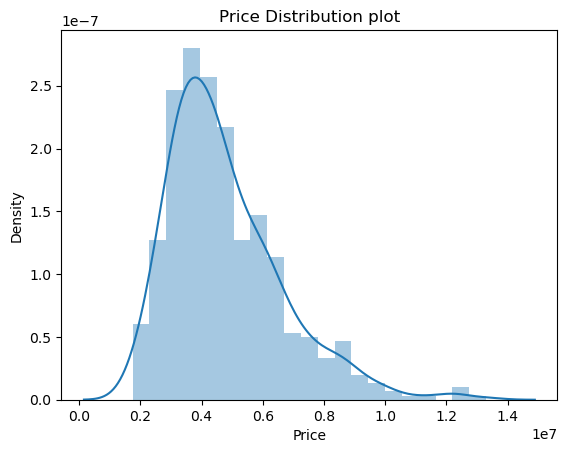

In [7]:
sns.distplot(df['price'])
plt.xlabel("Price")
plt.title("Price Distribution plot")

([<matplotlib.patches.Wedge at 0x249062b32b0>,
 [Text(-0.6022016005293036, 0.9205179152628944, 'AC Houses'),
  Text(0.6022016005293035, -0.9205179152628945, 'Non AC Houses')],
 [Text(-0.32847360028871103, 0.5021006810524877, '68.44%'),
  Text(0.3284736002887109, -0.5021006810524878, '31.56%')])

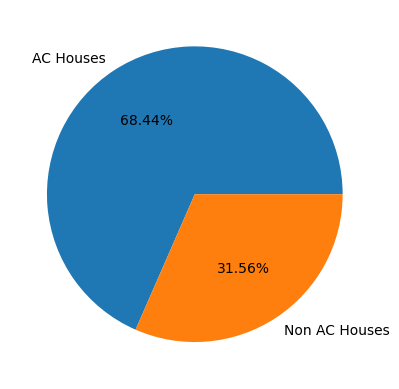

In [8]:
plt.pie(df['airconditioning'].value_counts(),labels=['AC Houses','Non AC Houses'],autopct="%.2f%%")

# Nowadays AC is a very much needed thing so probably house with AC has more prices let's check in bar plot



> Bivariate Analysis



<BarContainer object of 545 artists>

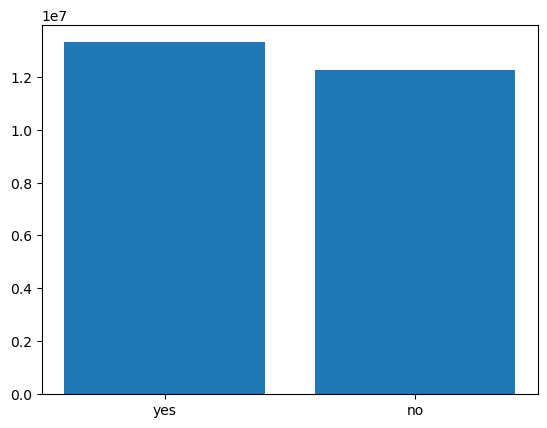

In [9]:
plt.bar(df['airconditioning'],df['price']) 

<BarContainer object of 545 artists>

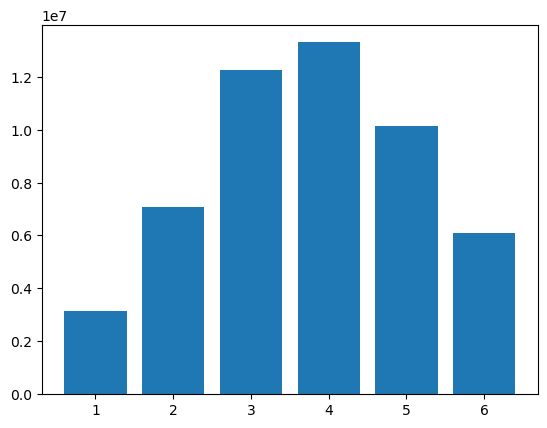

In [10]:
plt.bar(df['bedrooms'],df['price']) # Here the highest price is for 4 beds then its decreasing for 6 beds

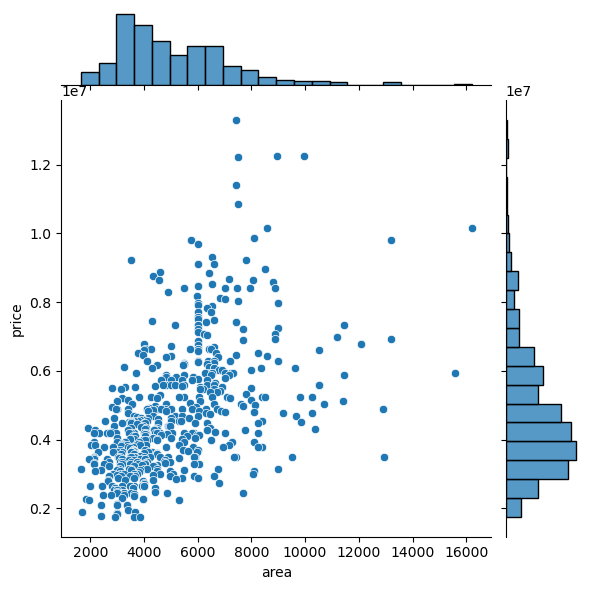

In [11]:
sns.jointplot(data=df,x='area',y='price')

#If area of house is 6000 to 12000 we have high prices after thean 



> Multivariate Analysis



In [12]:
corr_df = pd.read_csv('Housing.csv')
LE = LabelEncoder()
a = corr_df.iloc[:,[5,6,7,8,9,11]]

for column in a:
    corr_df[column] = LE.fit_transform(corr_df[column])

#Duplicate dataset to apply encoding and find correlation

<Axes: >

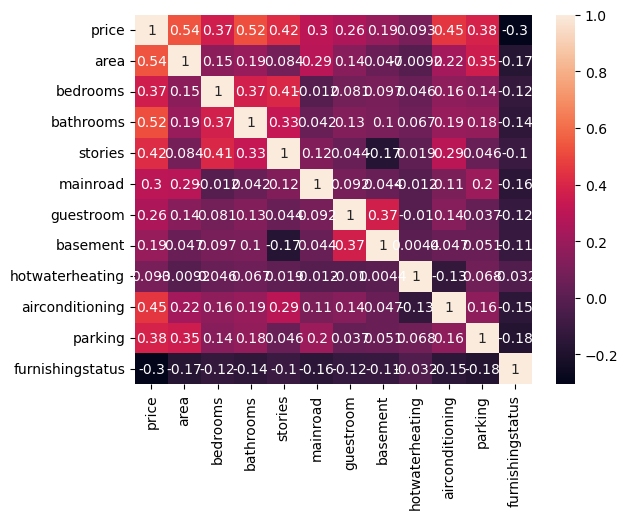

In [13]:
sns.heatmap(corr_df.corr(),annot=True)

# Here I performed encoding to find the correlation of the categorical variables too with the price
# We found out that area>bathrooms>ac>stories are the correlation order for price so these variable are a important one 

In [ ]:
sns.pairplot(df)

# 4 bedrooms have high price and no bedrooms and 6 bedrooms have low price
# 2 bathrooms have high price and we can't find the lower price because every number has equal prices
# 2 and 4 stories have high price even though we have a high price for 3 story but its an outlier and low price for 1 story
# 2 parking space have high price and no parking space has low price

# Descriptive Statistics

We'll take only the numerical columns for the descriptive analysis for some functions so we'll create a new dataframe named df1 containg only numerical columns

In [ ]:
df1 = df.iloc[:,[0,1,2,3,4,10]]
df1.head()

In [ ]:
df1.mean()

In [ ]:
df1.median()

In [ ]:
df.mode()

In [ ]:
df.max()

In [ ]:
df.min()

In [ ]:
df.var()

In [ ]:
df.std()

In [ ]:
quantile = df1.quantile(q=[0.25,0.75])
quantile

In [ ]:
IQR = quantile.iloc[1]-quantile.iloc[0]
upper_extreme = quantile.iloc[1]+(1.5*IQR)
upper_extreme

In [ ]:
lower_extreme = quantile.iloc[0]-(1.5*IQR)
lower_extreme

In [ ]:
df.skew()

In [ ]:
df.kurt()

In [ ]:
corr_df.corr()

In [ ]:
df['bathrooms'].value_counts()

In [ ]:
df['parking'].value_counts()

# Outliers

In [ ]:
sns.boxplot(df)

In [ ]:
for column in ['price','area']:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  l_e = Q1 - (1.5*IQR)
  u_e = Q1 + (1.5*IQR)
  df[column] = np.where(df[column]>u_e,u_e,np.where(df[column]<l_e,l_e,df[column]))

# Removing outliers only for area and price 

In [ ]:
sns.boxplot(df) # Outliers on Area and Price removed

# Encoding

In [ ]:
LE = LabelEncoder()
xf = df.iloc[:,[5,6,7,8,9,11]].columns
for column in xf:
  df[column] = LE.fit_transform(df[column])
df

In [ ]:
df.info() #no more object dtype

# Split the data into dependent and independent variable

In [ ]:
x = df.iloc[:,1:].values  # Except 1st column (all columns except price)
y = df.iloc[:,0].values   # Only 1st column (only price)

In [ ]:
x

In [ ]:
y

# Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

# Feature Scaling

Here I'm doing the feature scaling after the train test split because I have refered many articles and in many of them Feature scaling after train test split is suggested so I'll be doing like that

In [ ]:
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [ ]:
x_train 

In [ ]:
x_test

# Model Building

Our target varible is a numeric one so we shall do the regression here I have tried all the regression models namely


1.   Multilinear Regression
2.   Polynomial Regression
3.   Support Vector Regression
4.   Decision Tree Regression
5.   Random Forest Regression
6.   Lasso Regression
7.   Ridge Regression





> # Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression()
LR.fit(x_train,y_train)

In [ ]:
y_predMLR = LR.predict(x_test)

In [ ]:
r2_score(y_test,y_predMLR) 


> # Polynomial Regression



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
PF = PolynomialFeatures(degree=4)
x_poly = PF.fit_transform(x_train)
x_poly

In [ ]:
LR1 = LinearRegression()
LR1.fit(x_poly,y_train)

In [ ]:
y_predPR = LR1.predict(PF.fit_transform(x_test))

In [ ]:
r2_score(y_test,y_predPR) # Worst score



> # Support Vector Regression


In [ ]:
from sklearn.svm import SVR
SV = SVR(kernel='rbf') # Let's use gaussian radial basis function
SV.fit(x_train,y_train)

In [ ]:
y_predSVR = SV.predict(x_test)

In [ ]:
r2_score(y_test,y_predSVR)  # Worst Model



> # Decision Tree Regression



In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion='squared_error',random_state=0)
DTR.fit(x_train,y_train)

In [ ]:
y_predDTR = DTR.predict(x_test)

In [ ]:
r2_score(y_test,y_predDTR)

> # Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,random_state=0)

In [ ]:
RFR.fit(x_train,y_train)

In [ ]:
y_predRFR = RFR.predict(x_test)

In [ ]:
r2_score(y_test,y_predRFR)


> # Lasso Regression



In [ ]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(x_train,y_train)

In [ ]:
y_predL = L.predict(x_test)

In [ ]:
r2_score(y_test,y_predL)



> # Ridge Regression



In [ ]:
from sklearn.linear_model import Ridge
R = Ridge()

In [ ]:
R.fit(x_train,y_train)

In [ ]:
y_predR = R.predict(x_test)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_predR.reshape(len(y_predR),1), y_test.reshape(len(y_test),1)),1))

#Comparison of our predicted value with original value side by side

In [ ]:
r2_score(y_test,y_predR)

R^2 Summary:

Multilinear Regression    : 0.6542

Polynomial Regression     : -8.013

Support Vector Regression : -0.021

Decision Tree Regression  : 0.5559

Random Forest Regression  : 0.6033

Lasso Regression          : 0.6542

Ridge Regression          : 0.6543

In [ ]:
R.predict(SS.fit_transform([[8000,3,3,2,1,1,1,1,1,2,0]]))

# Here we are predicting the price for a house of area 8000 and has 4 bedrooms and has 2 bathrooms and has 2 stories and its in mainroad and it has a guestroom and a basement too with hotwater heating and AC capabilities and has 2 parking slots and it has fully furnished furnitures 
# The house price is ₹45,67,443

# Model Evaluation

We high R^2 score for Ridge Regression so we'll use that model and find its other performance metrics and 

I got higher r^2 value for Ridge Regression If I didn't treat the outliers

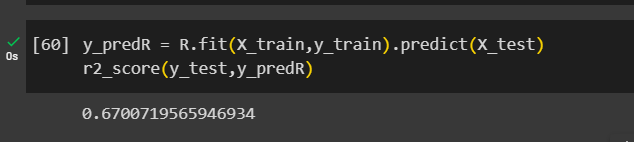

In [ ]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_predR))
print(np.sqrt(metrics.mean_squared_error(y_test,y_predR)))
print(metrics.r2_score(y_test,y_predR))